<a href="https://colab.research.google.com/github/euneun316/Kaggle/blob/main/Titanic-Machine_Learning_from_Disaster/Titanic_Machine_Learning_from_Disaster.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Titanic - Machine Learning from Disaster

- kaggle에서 제공하는 타이타닉 데이터를 통해 생존자와 사망자를 예측

## 1.Kaggle Titanic Data Import

In [ ]:
!pip install kaggle

In [ ]:
# Warning: Looks like you're using an outdated API Version, please consider updating (server 1.5.12 / client 1.5.4)
!pip install --upgrade --force-reinstall --no-deps kaggle

     |████████████████████████████████| 58 kB 3.0 MB/s 
  Created wheel for kaggle: filename=kaggle-1.5.12-py3-none-any.whl size=73051 sha256=dc5e4df2660c5c1132279a49be3037f28839f3d69d1c4bc3b5ce150ff6ccbe82
  Stored in directory: /root/.cache/pip/wheels/62/d6/58/5853130f941e75b2177d281eb7e44b4a98ed46dd155f556dc5
Successfully built kaggle
  Attempting uninstall: kaggle
    Found existing installation: kaggle 1.5.12
    Uninstalling kaggle-1.5.12:
      Successfully uninstalled kaggle-1.5.12


In [ ]:
# Create New API Token
# kaggle.json 업로드
from google.colab import files
files.upload()

In [ ]:
!ls -al

total 198
-rw------- 1 root root   3258 Jan 19 04:46 gender_submission.csv
-rw------- 1 root root     63 Jan 27 21:17 kaggle.json
-rw------- 1 root root  28629 Jan 19 04:46 test.csv
-rw------- 1 root root 108268 Jan 27 17:27 titanic3.csv
-rw------- 1 root root  61194 Jan 19 04:46 train.csv


In [ ]:
!mkdir -p ~/.kaggle

In [ ]:
!!ls -al ~/

['total 72',
 'drwx------ 1 root root 4096 Jan 27 21:13 .',
 'drwxr-xr-x 1 root root 4096 Jan 27 16:51 ..',
 '-r-xr-xr-x 1 root root 1169 Jan  1  2000 .bashrc',
 'drwxr-xr-x 1 root root 4096 Jan 27 21:13 .cache',
 'drwxr-xr-x 1 root root 4096 Jan 27 16:52 .config',
 'drwxr-xr-x 3 root root 4096 Jan 25 14:12 .gsutil',
 'drwxr-xr-x 1 root root 4096 Jan 25 14:40 .ipython',
 'drwx------ 2 root root 4096 Jan 25 14:40 .jupyter',
 'drwxr-xr-x 2 root root 4096 Jan 27 21:14 .kaggle',
 'drwxr-xr-x 2 root root 4096 Jan 27 16:52 .keras',
 'drwx------ 1 root root 4096 Jan 25 14:40 .local',
 'drwxr-xr-x 4 root root 4096 Jan 25 14:40 .npm',
 '-rw-r--r-- 1 root root  148 Aug 17  2015 .profile',
 '-r-xr-xr-x 1 root root  254 Jan  1  2000 .tmux.conf']

In [ ]:
!cp kaggle.json ~/.kaggle/kaggle.json

In [ ]:
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!ls -al ~/.kaggle

total 16
drwxr-xr-x 2 root root 4096 Jan 27 21:14 .
drwx------ 1 root root 4096 Jan 27 21:13 ..
-rw------- 1 root root   63 Jan 27 21:18 kaggle.json


In [ ]:
!kaggle competitions list

ref                                            deadline             category            reward  teamCount  userHasEntered  
---------------------------------------------  -------------------  ---------------  ---------  ---------  --------------  
contradictory-my-dear-watson                   2030-07-01 23:59:00  Getting Started     Prizes         80           False  
gan-getting-started                            2030-07-01 23:59:00  Getting Started     Prizes        116           False  
store-sales-time-series-forecasting            2030-06-30 23:59:00  Getting Started  Knowledge        859           False  
tpu-getting-started                            2030-06-03 23:59:00  Getting Started  Knowledge        173           False  
digit-recognizer                               2030-01-01 00:00:00  Getting Started  Knowledge       1877           False  
titanic                                        2030-01-01 00:00:00  Getting Started  Knowledge      14115           False  
house-pr

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
cd /content/drive/MyDrive/Colab Notebooks/Kaggle/Titanic-Machine_Learning_from_Disaster/Titanic_Data/

/content/drive/MyDrive/Colab Notebooks/Kaggle/Titanic-Machine_Learning_from_Disaster/Titanic_Data


In [ ]:
ls -al

total 198
-rw------- 1 root root   3258 Jan 19 04:46 gender_submission.csv
-rw------- 1 root root     63 Jan 27 21:18 kaggle.json
-rw------- 1 root root  28629 Jan 19 04:46 test.csv
-rw------- 1 root root 108268 Jan 27 17:27 titanic3.csv
-rw------- 1 root root  61194 Jan 19 04:46 train.csv


In [ ]:
!kaggle competitions download -c titanic

## 2.import  library

In [ ]:
# 데이터 불러오기
import pandas as pd
import numpy as np
import random as rnd

In [ ]:
# 시각화
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

# 그래프를 선명하게 설정
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('retina')

# 시각화 선명하게 설정
%config InlineBackend.figure_format = 'retina'

# 그래프에서 마이너스 폰트 깨지는 문제에 대한 대처
mpl.rcParams['axes.unicode_minus'] = False

# notebook을 실행한 브라우저에서 바로 그림을 볼 수 있게 해주는 것
# Rich output(도표와 같은 그림, 소리, 애니메이션 과 같은 결과물)
# 그래프를 노트북 안에 그리기 위해 설정
%matplotlib inline

# 데이터프레임의 행과 열을 몇 개까지 출력해서 확인할 건지 설정
pd.options.display.max_rows = 30
pd.options.display.max_rows = 30

# Seaborn을 통한 설정
# 스타일, 폰트 설정
sns.set_theme(font ='NanumBarunGothic',
        	rc = {'axes.unicode_minus' : False},
        	style ='whitegrid')

In [ ]:
# 머신러닝
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier

In [ ]:
# matplotlib
print ('버전: ', mpl.__version__)
print ('설치 위치: ', mpl.__file__)
print ('설정 위치: ', mpl.get_configdir())
print ('캐시 위치: ', mpl.get_cachedir())
print ('설정파일 위치: ', mpl.matplotlib_fname())

버전:  3.2.2
설치 위치:  /usr/local/lib/python3.7/dist-packages/matplotlib/__init__.py
설정 위치:  /root/.config/matplotlib
캐시 위치:  /root/.cache/matplotlib
설정파일 위치:  /usr/local/lib/python3.7/dist-packages/matplotlib/mpl-data/matplotlibrc


In [ ]:
# 설정 되어있는 폰트 사이즈
print (plt.rcParams['font.size'] ) 
# 설정 되어있는 폰트 글꼴
print (plt.rcParams['font.family'] )

12.0
['NanumBarunGothic']


In [ ]:
!apt-get update -qq
!apt-get install fonts-nanum* -qq

# !sudo apt-get install -y fonts-nanum
# !sudo fc-cache -fv
# !rm ~/.cache/matplotlib -rf

path = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf' 
font_name = fm.FontProperties(fname=path, size=10).get_name()
print(font_name)
plt.rc('font', family=font_name)

fm._rebuild()

Selecting previously unselected package fonts-nanum.
(Reading database ... 155229 files and directories currently installed.)
Preparing to unpack .../fonts-nanum_20170925-1_all.deb ...
Unpacking fonts-nanum (20170925-1) ...
Selecting previously unselected package fonts-nanum-eco.
Preparing to unpack .../fonts-nanum-eco_1.000-6_all.deb ...
Unpacking fonts-nanum-eco (1.000-6) ...
Selecting previously unselected package fonts-nanum-extra.
Preparing to unpack .../fonts-nanum-extra_20170925-1_all.deb ...
Unpacking fonts-nanum-extra (20170925-1) ...
Selecting previously unselected package fonts-nanum-coding.
Preparing to unpack .../fonts-nanum-coding_2.5-1_all.deb ...
Unpacking fonts-nanum-coding (2.5-1) ...
Setting up fonts-nanum-extra (20170925-1) ...
Setting up fonts-nanum (20170925-1) ...
Setting up fonts-nanum-coding (2.5-1) ...
Setting up fonts-nanum-eco (1.000-6) ...
Processing triggers for fontconfig (2.12.6-0ubuntu2) ...
NanumBarunGothic


In [ ]:
font_list = fm.findSystemFonts(fontpaths=None, fontext='ttf')

# ttf 폰트 전체갯수
print(len(font_list)) 

48


In [ ]:
# 설치된 폰트 출력
font_list = [font.name for font in fm.fontManager.ttflist]
font_list

In [ ]:
fm._rebuild()

In [ ]:
#'Nanum'이 들어간 폰트만 가져오기
[(f.name, f.fname) for f in fm.fontManager.ttflist if 'Nanum' in f.name]

In [ ]:
# 버전차이로 인해 출력되는 에러 문구 무시
import warnings
warnings.filterwarnings(action='ignore')

## 3.OverView

- RMS 타이타닉(영어: RMS Titanic) : 영국의 화이트 스타 라인이 운영한 북대서양 횡단 여객선
- 사건 발생: 1912년 4월 10일 영국의 사우샘프턴을 떠나 미국의 뉴욕으로 향하던 첫 항해 중에 4월 15일 빙산과 충돌하여 침몰
- 1912년 4월 14일 오후 11시 40분(선내 시각, GMT -3) 빙산과 충돌
- 승객 대다수는 영국과 스칸다나비아 반도 등에서 새로운 삶을 찾아 미국으로 가는 이민자.
- 타이타닉이 완전히 침몰한 시간 : 새벽 2시 20분
>- 타이타닉의 침몰 사망 인원 : **1,514**명
>- 출항 당시 승선 인원 : **2,223명**
>- 구명정 : **20척**, 최대 정원 : **1,178명**
>- 구명정 구조 인원 :  **706명** ( +3명은?)
- 구명정을 타고 있다가 몇 시간 뒤 RMS 카르파티아(RMS Carpathia)로 구조
- 주갑판이 함몰되고 우현에 구멍이 났다. 구멍으로 물이 들어오기 시작한 지 2시간 40분만에 완전히 침수되어 침몰하였다.
- 구명정에 타지 못한 채 바다로 뛰어든 수많은 사람들은 수 분 내에 저체온증으로 사망하였다. 
- 침몰 당시에도 배에 1,000여명의 사람들이 남아 있었다. 
---
[시설]
- 보트 갑판 : 1등실 산책로의 경우 외관을 잘 볼 수 있게 하기 위해 구명보트가 설치되어 있지 않았는데, 이것이 참사의 원인 중 하나가 되었다.
>- 1등실 : **329명** 부유한 승객
>- 2등실 : **285명** 중산층 승객
>- 3등실 : **710명** 가난한 승객
---
[대피]
- 여자와 어린이 먼저
- 여자와 어린이만 태웠기 때문에 자리가 있었음에도 남자는 승무원들이 거부하였고 그로인해 구명보트 정원의 절반도 못태운채 보트가 내려감
>- 구명보트 7호 : 정원 65명에 28명을 태우고 처음으로 내려짐
>- 구명보트 6호 : 28명
>- 구명보트 5호 : 41명
>- 구명보트 3호 : 32명
>- 구명보트 8호 : 39명
>- 구명보트 1호 : 12명
>- 구명보트 11호 : 정원을 다섯명을 초과
>- 접이식 보트 D
>- 접이식 보트 B는 30여명의 사람들이 선 상태로 뒤집힘
>- 접이식 보트 A는 제대로 뜨긴 했으나 물이 반쯤 찼다.
- 보일러실에서 화부, 기관부 선원들 사망
---
[구조]
- 영하 2도의 차가운 바다에 있던 사람들은 저체온증으로 대부분이 30분 안에 죽었다.
- 결국 4명의 생존자가 추가로 구조
- 5명의 생존자는 구명보트 안에서 사망
>1. 1등실
>- 어린이1명 빼고 모두 구조
>2. 2등실
>- 어린이 모두 구조
>- 성인남자 승객은 168명 중 겨우 14명만 구조
>3. 3등실
>-  특이하게 이민자들보다도 신분이 낮은 하인들이 많이 구조되었다.

---
![Titanic](https://upload.wikimedia.org/wikipedia/commons/3/33/Titanic_sinking_gif.gif)

## 4.Exploratory Data Analysis (EDA) 탐색적 자료분석

- train.csv : 모델 학습에 사용되는 데이터
- test.csv : 모델 적용 대상이 되는 데이터
- titanic3.csv : 타이타닉 전체 데이터

#### 변수설명

|**Variable**|**Definition**|**Key**|**Description**|
|:--------:|:-----------:|:--------:|:---:|
|PassengerId|||각 승객의 고유 번호|
|Survival| Survival| 0 = No, 1 = Yes|0=사망, 1=생존<br />생존 여부(종속 변수)|
|Pclass| Ticket class| 1 = 1st, 2 = 2nd, 3 = 3rd|객실 등급 - 승객의 사회적, 경제적 지위|
|Name|name||이름|
|Sex|Sex ||성별|
|Age|Age in years||나이|
|Sibsp| # of siblings / spouses aboard the Titanic ||동반한 Sibling(형제자매)<br />Spouse(배우자) 수|
|Parch|# of parents / children aboard the Titanic||동반한 Parent(부모) <br />Child(자식)의 수|
|Ticket| Ticket number||티켓의 고유넘버|
|Fare| Passenger fare||티켓의 요금|
|Cabin| Cabin number||객실 번호|
|Embarked|Port of Embarkation|C = Cherbourg<br />Q = Queenstown<br />S = Southampton|승선한 항|
|boat|||탈출을 했다면 탑승한 보트의 번호|
|body||||
|home.dest||||

In [ ]:
# row 생략 없이 출력
pd.set_option('display.max_rows', None)
# pd.set_option('display.max_rows', 10)
# col 생략 없이 출력
pd.set_option('display.max_columns', None)
# pd.set_option('display.max_columns', 10)

In [ ]:
train_df=pd.read_csv("train.csv")
test_df=pd.read_csv("test.csv")
gender_submission = pd.read_csv("gender_submission.csv")
# 모델 적용의 일관성을 위해,
# train과 test를 합한 combine 데이터 셋도 지정
combine=[train_df,test_df]

In [ ]:
# The Complete Titanic Dataset
url = 'https://raw.githubusercontent.com/euneun316/Kaggle/main/Titanic-Machine_Learning_from_Disaster/Titanic_Data/titanic3.csv'

titanic3_df = pd.read_csv(url)
titanic3_df_1 = pd.read_csv(url).iloc[:, :-3]
# titanic3_df_1.head(3)
titanic3_df.head(3)

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


In [ ]:
print(train_df.columns.values)
print(titanic3_df_1.columns.values)

['PassengerId' 'Survived' 'Pclass' 'Name' 'Sex' 'Age' 'SibSp' 'Parch'
 'Ticket' 'Fare' 'Cabin' 'Embarked' 'Name_fix' 'Age_median']
['pclass' 'survived' 'name' 'sex' 'age' 'sibsp' 'parch' 'ticket' 'fare'
 'cabin' 'embarked']


In [ ]:
train_df.columns.unique

<bound method Index.unique of Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'Name_fix',
       'Age_median'],
      dtype='object')>

In [ ]:
#Passengerid는 순서를 나타내는 데이터이므로 생존 예측에는 영향을 미치지 않을 것이므로 컬럼을 삭제
del train_df['PassengerId']

In [ ]:
test_df.drop('PassengerId', axis=1, inplace=True)

In [ ]:
train_df.fillna(0)

In [ ]:
train_df['Embarked'].value_counts(normalize=True)

S    0.724409
C    0.188976
Q    0.086614
Name: Embarked, dtype: float64

In [ ]:
train_df['Fare'].value_counts().head(10)

8.0500     43
13.0000    42
7.8958     38
7.7500     34
26.0000    31
10.5000    24
7.9250     18
7.7750     16
26.5500    15
0.0000     15
Name: Fare, dtype: int64

In [ ]:
# corr() : 양의 정수는 비례하는 정도를, 음의 정수는 반비례하는 정도를 의미한다.
train_df.corr()

,Survived,Pclass,Age,SibSp,Parch,Fare,Age_median
Survived,1.000000,-0.338481,-0.078774,-0.035322,0.081629,0.257307,-0.152669
Pclass,-0.338481,1.000000,-0.353962,0.083081,0.018443,-0.549500,-0.125118
Age,-0.078774,-0.353962,1.000000,-0.265679,-0.188200,0.097873,0.540758
SibSp,-0.035322,0.083081,-0.265679,1.000000,0.414838,0.159651,-0.304029
Parch,0.081629,0.018443,-0.188200,0.414838,1.000000,0.216225,-0.216980
Fare,0.257307,-0.549500,0.097873,0.159651,0.216225,1.000000,-0.039676
Age_median,-0.152669,-0.125118,0.540758,-0.304029,-0.216980,-0.039676,1.000000


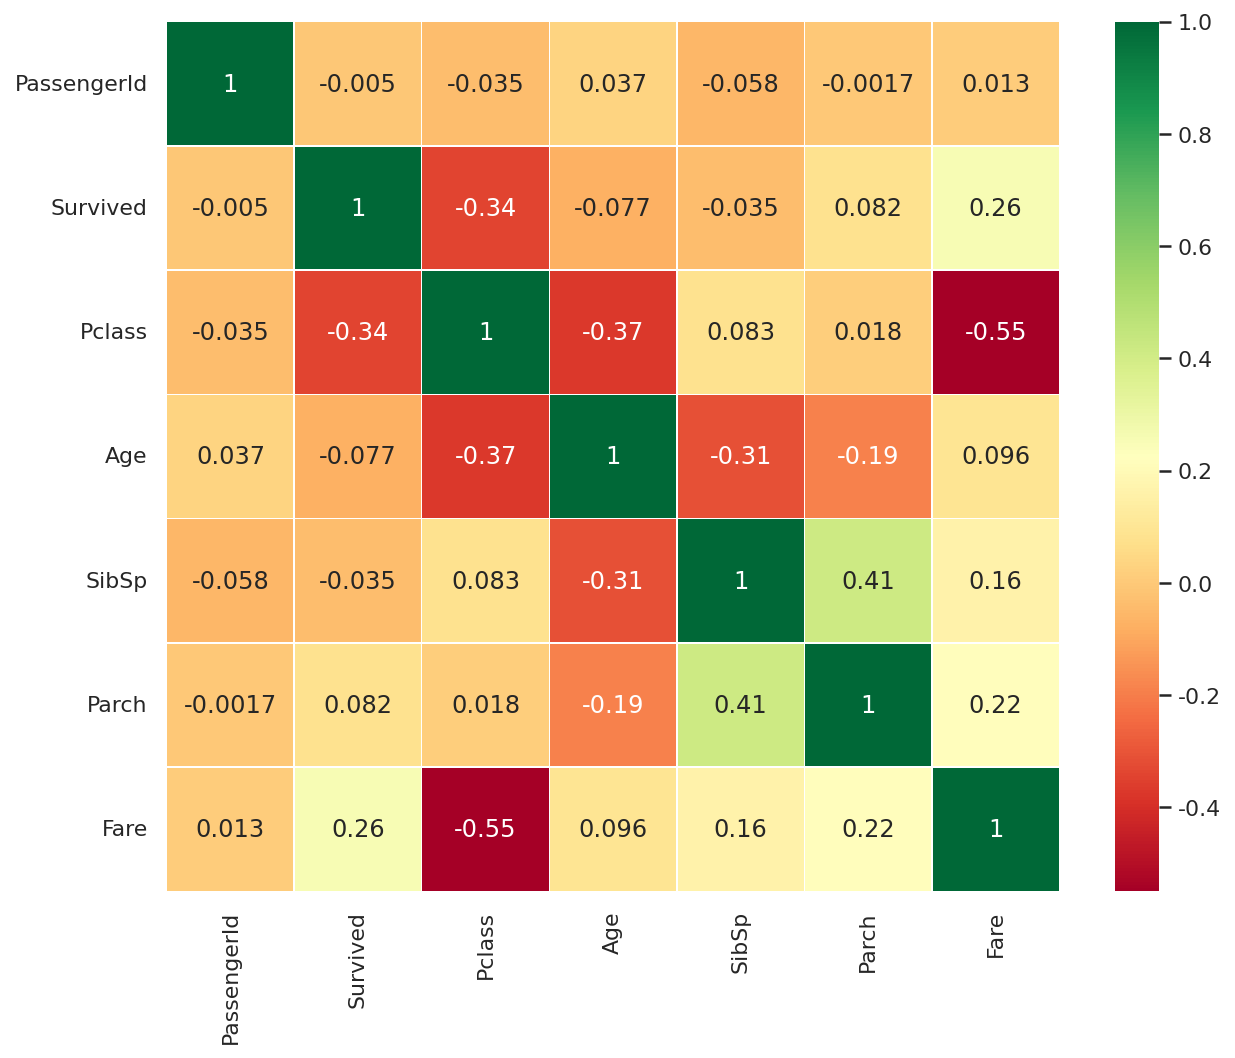

In [ ]:
sns.heatmap(train_df.corr(), annot = True, cmap = 'RdYlGn', linewidth = 0.2)
fig = plt.gcf()
fig.set_size_inches(10, 8)
plt.show()

- Age 컬럼과 Pclass 컬럼의 상관관계가 높다
- Pclass 컬럼과 Survived 컬럼의 상관관계가 높다
- Pclass 컬럼과 Fare 컬럼의 상관관계가 높다

In [ ]:
# 데이터 미리 보기
train_df.head()

# 두 변수의 관계에서 설명을 하는 변수 : 설명변수(explanatory variable)
# 이에 반응하는 변수를 : 반응변수(response variable)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Name_fix,Age_median
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr,30.0
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs,35.0
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss,21.0
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs,35.0
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr,30.0


In [ ]:
train_df.tail()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


### pd.DataFrame.shape
- 데이터 프레임의 행의 개수와 열의 개수가 저장되어 있는 속성(attribute)

In [ ]:
train_df.shape

(891, 14)

### pd.DataFrame.info()
- 데이터셋의 column별 정보를 알려주는 함수
- 비어있지 않는 값은 (non-null)은 몇개인지?
- coulum type은 무엇인지

In [ ]:
titanic3_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   pclass     1309 non-null   int64  
 1   survived   1309 non-null   int64  
 2   name       1309 non-null   object 
 3   sex        1309 non-null   object 
 4   age        1046 non-null   float64
 5   sibsp      1309 non-null   int64  
 6   parch      1309 non-null   int64  
 7   ticket     1309 non-null   object 
 8   fare       1308 non-null   float64
 9   cabin      295 non-null    object 
 10  embarked   1307 non-null   object 
 11  boat       486 non-null    object 
 12  body       121 non-null    float64
 13  home.dest  745 non-null    object 
dtypes: float64(3), int64(4), object(7)
memory usage: 143.3+ KB


- Age, Cabin, Embarked 컬럼에 결측치가 있음을 확인

In [ ]:
# Survived - 생존 여부
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Survived    891 non-null    int64  
 1   Pclass      891 non-null    int64  
 2   Name        891 non-null    object 
 3   Sex         891 non-null    object 
 4   Age         891 non-null    float64
 5   SibSp       891 non-null    int64  
 6   Parch       891 non-null    int64  
 7   Ticket      891 non-null    object 
 8   Fare        891 non-null    float64
 9   Cabin       204 non-null    object 
 10  Embarked    889 non-null    object 
 11  Name_fix    891 non-null    object 
 12  Age_median  891 non-null    float64
dtypes: float64(3), int64(4), object(6)
memory usage: 90.6+ KB


In [ ]:
# 테스트 자료 정보
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    418 non-null    int64  
 1   Name      418 non-null    object 
 2   Sex       418 non-null    object 
 3   Age       332 non-null    float64
 4   SibSp     418 non-null    int64  
 5   Parch     418 non-null    int64  
 6   Ticket    418 non-null    object 
 7   Fare      417 non-null    float64
 8   Cabin     91 non-null     object 
 9   Embarked  418 non-null    object 
dtypes: float64(2), int64(3), object(5)
memory usage: 32.8+ KB


### pd.DataFrame.describe()
- 숫자형 (int, float) column들의 기술 통계량을 보여주는 함수
- 기술통계량이란?
  - 해당 column을 대표할 수 있는 통계값들을 의미
- 기술통계량 종류
  - count: 해당 column에서 비어 있지 않은 값의 개수
  - mean: 평균
  - std: 표준편차
  - min: 최솟값 (이상치 포함)
  - 25% (Q1): 전체 데이터를 순서대로 정렬했을 때, 아래에서 부터 1/4번째 지점에 있는 값
  - 50% (Q2): 중앙값 (전체 데이터를 순서대로 정렬했을 때, 아래에서 부터 2/4번째 지점에 있는 값)
  - 75% (Q3): 전체 데이터를 순서대로 정렬했을 때, 아래에서 부터 3/4번째 지점에 있는 값
  - max: 최댓값 (이상치 포함)
- 이상치: 울타리 밖에 있는 부분을 이상치라고 정의함
  - 아래쪽 울타리: Q_1Q1​ - 1.5 * IQR1.5∗IQR
  - 위쪽 울타리: Q_3Q3​ + 1.5 * IQR1.5∗IQR
  - IQRIQR = Q_3 - Q_1Q3​−Q1​


  <img src="https://miro.medium.com/max/10125/1*NRlqiZGQdsIyAu0KzP7LaQ.png"  alt="img" width="400" height="400"/>

In [ ]:
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


+ 훈련 자료 샘플 수 : 891 (count=891)
+ 훈련 자료 샘플 내 생존율 : 38.4% (mean의 Survived=0.383838)

In [ ]:
titanic3_df.describe()

,pclass,survived,age,sibsp,parch,fare,body
count,1309.000000,1309.000000,1046.000000,1309.000000,1309.000000,1308.000000,121.000000
mean,2.294882,0.381971,29.881135,0.498854,0.385027,33.295479,160.809917
std,0.837836,0.486055,14.413500,1.041658,0.865560,51.758668,97.696922
min,1.000000,0.000000,0.166700,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,21.000000,0.000000,0.000000,7.895800,72.000000
50%,3.000000,0.000000,28.000000,0.000000,0.000000,14.454200,155.000000
75%,3.000000,1.000000,39.000000,1.000000,0.000000,31.275000,256.000000
max,3.000000,1.000000,80.000000,8.000000,9.000000,512.329200,328.000000


- 수치형 자료 : 양적 자료 ex) 키,몸무게,성적
  - 연속형 자료 : 키, 몸무게 (연속적 자료)
  - 이산형 자료 : 자동차 건수 (셀 수 있는 자료)
- 번주형 자료 : 질적 자료 ex) 성별, 선호도, 혈액형
  - 순위형 자료 : 선호도 (순서)
  - 명목형 자료 : 혈액형 (순서 의미 없음)

In [ ]:
# 훈련 자료 object 변수 통계치
# train_df.describe(include=['O']) #-> 범주형 데이터
train_df.describe(include=['object'])
# train_df.describe(include=['number'])
# train_df.describe(include="all") # 입력의 모든 열

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Long, Mr. Milton Clyde",male,CA. 2343,B96 B98,S
freq,1,577,7,4,644


### pd.Series.value_counts()
- series 내 고유값들 각각의 개수를 보여줌
- 가장 많이 나오는 고유값들 순서로 보여줌
- 비어 있는 값은 고려하지 않음

In [ ]:
train_df.value_counts()

PassengerId  Survived  Pclass  Name                                                  Sex     Age   SibSp  Parch  Ticket    Fare      Cabin  Embarked
890          1         1       Behr, Mr. Karl Howell                                 male    26.0  0      0      111369    30.0000   C148   C           1
337          0         1       Pears, Mr. Thomas Clinton                             male    29.0  1      0      113776    66.6000   C2     S           1
332          0         1       Partner, Mr. Austen                                   male    45.5  0      0      113043    28.5000   C124   S           1
330          1         1       Hippach, Miss. Jean Gertrude                          female  16.0  0      1      111361    57.9792   B18    C           1
328          1         2       Ball, Mrs. (Ada E Hall)                               female  36.0  0      0      28551     13.0000   D      S           1
                                                                                 

In [ ]:
train_df.columns.unique

<bound method Index.unique of Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')>

### Data Cleansing & Pre-Processing 데이터 전처리

#### 1.텍스트 전처리(Name)
- 승객 이름의 정보에서 Mr., Miss. 등의 정보를 정규표현식을 이용해서 추출

In [ ]:
train_df['Name'].head(5)

0                              Braund, Mr. Owen Harris
1    Cumings, Mrs. John Bradley (Florence Briggs Th...
2                               Heikkinen, Miss. Laina
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                             Allen, Mr. William Henry
Name: Name, dtype: object

In [ ]:
# \w : 알파벳과 _ (언더바)
# expend=Flase인 경우 label 단위, expend=True인 경우 column 단위
train_df['Name_fix'] = train_df['Name'].str.extract('( [A-Z]+\w*)', expand=False).str.strip()

In [ ]:
train_df['Name_fix'].value_counts()

Mr             503
Miss           179
Mrs            121
Master          40
Dr               7
Rev              6
Impe             3
Planke           3
Gordon           2
Col              2
Castellana       2
Major            2
Mlle             2
Messemaeker      1
Mulder           1
Pelsmaeker       1
More             1
Velde            1
Countess         1
Jonkheer         1
Cruyssen         1
Manent           1
Walle            1
Shawah           1
Carlo            1
Ms               1
Billiard         1
Steen            1
Capt             1
Melkebeke        1
Don              1
Mme              1
Name: Name_fix, dtype: int64

- Mr. : 성인 남성 (503)
- Miss : 결혼을 하지 않은 여성 (179)
- Mrs. : 결혼을 한 여성 (121)
- Master (Mstr.) : 결혼을 하지 않은 남성. 주로 청소년 이하 (40)
- Dr : 의사 (7)

In [ ]:
train_df['Name_fix'] = np.where(train_df['Name_fix'].isin(['Mr','Miss','Mrs','Master','Dr']), train_df['Name_fix'], 'Others')
train_df['Name_fix'].value_counts()

Mr        503
Miss      179
Mrs       121
Others     41
Master     40
Dr          7
Name: Name_fix, dtype: int64

In [ ]:
train_df.groupby(['Name_fix'])['Survived'].mean().sort_values(ascending=False)

Name_fix
Mrs       0.801653
Miss      0.703911
Master    0.575000
Dr        0.428571
Others    0.341463
Mr        0.157058
Name: Survived, dtype: float64

In [ ]:
train_df.groupby('Name_fix')['Age'].mean()

Name_fix
Dr        42.000000
Master     4.574167
Miss      21.846154
Mr        32.463731
Mrs       36.182692
Others    35.141026
Name: Age, dtype: float64

- 해당 이름별로 나이의 평균
- 위 평균값을 이용하여 Age에 Null인 데이터에 평균값을 넣어준다.

In [ ]:
for ls_df in [train_df]:
    ls_df['Age'] = ls_df['Age'].astype(float)
    ls_df['Age_median'] = ls_df.groupby(['Name_fix'])['Age'].transform('median')
    ls_df['Age'] = np.where(ls_df['Age'].isnull(), ls_df['Age_median'], ls_df['Age'])

In [ ]:
train_df.Age.isnull().sum()

0

- 여성,아이의 생존률이 Mr(남성)의 생존률 보다 높다

<Figure size 504x432 with 0 Axes>

findfont: Font family ['NanumBarunGothic'] not found. Falling back to DejaVu Sans.


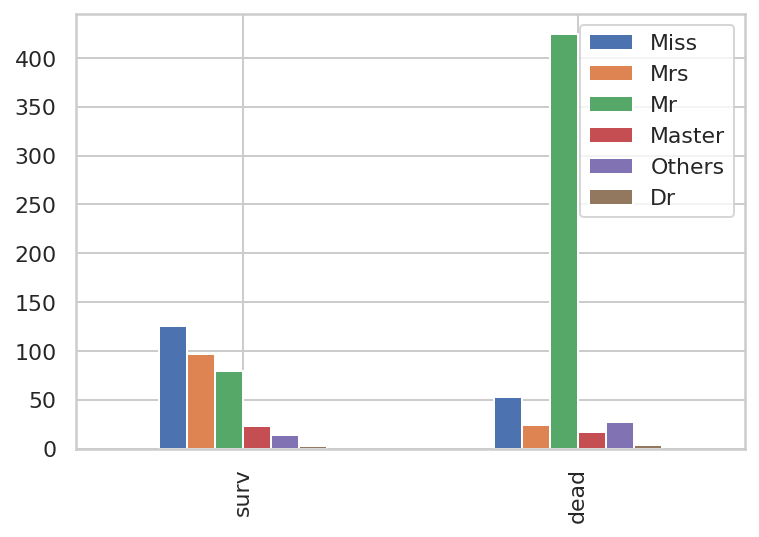

In [ ]:
def bar_df(df,colname):
    surv = df[df['Survived']==1][colname].value_counts()
    dead = df[df['Survived']==0][colname].value_counts()
    tt = pd.DataFrame([surv,dead], index=['surv','dead'])
    return tt

plt.figure(figsize=(7,6))
bar_df(train_df,'Name_fix').plot(kind='bar')
plt.show()

#### 이름(Name)별 객실(Pclass), 생존율

findfont: Font family ['NanumBarunGothic'] not found. Falling back to DejaVu Sans.


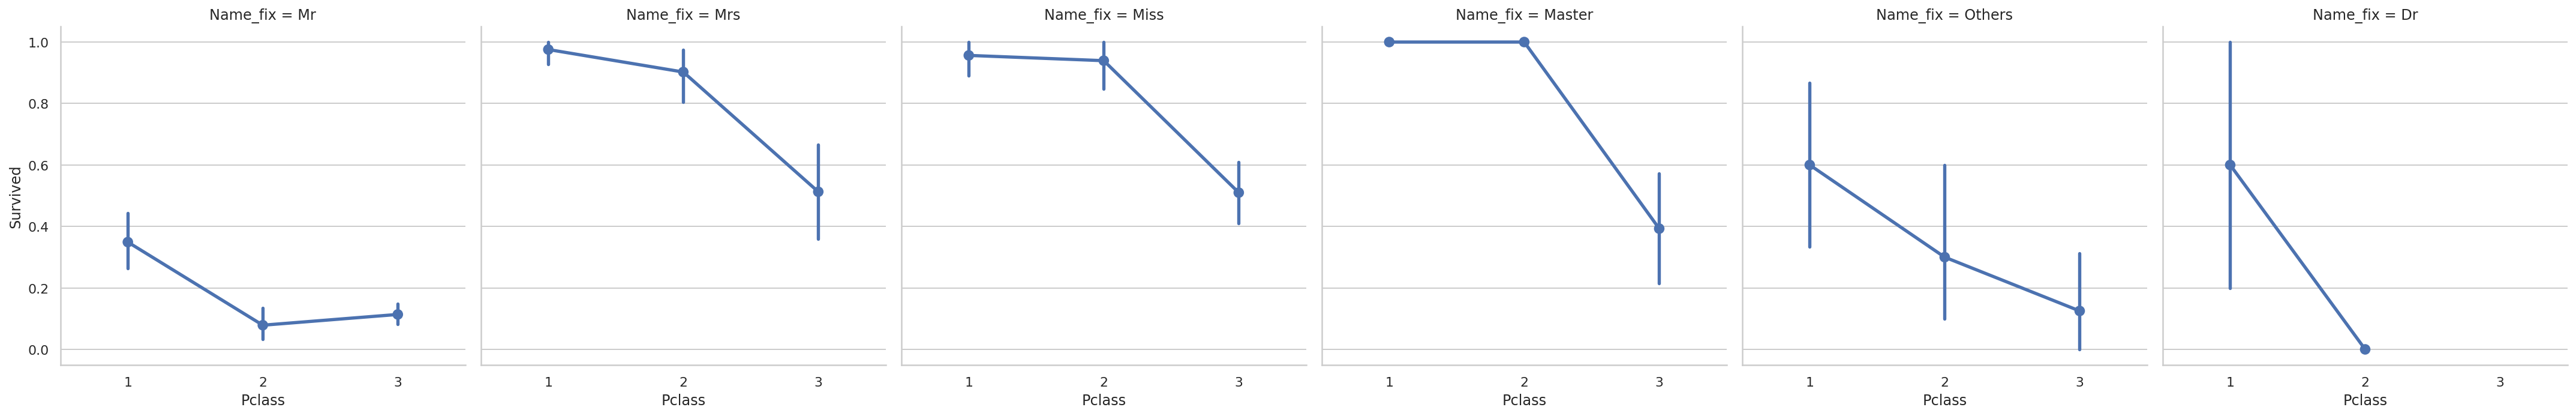

In [ ]:
sns.factorplot('Pclass','Survived',col='Name_fix',data=train_df)
plt.show()

---

### 객실 등급(Pclass)에 따른 생존율 비교

In [ ]:
train_df[['Pclass', 'Survived']].groupby(['Pclass'], as_index=False).mean().sort_values(by='Survived', ascending=False)
# groupby에 as_index를 False로 하면 Pclass를 index로 사용하지 않음
# ascending : 오름차순
# as_index를 True로 하면 Pclass를 index로 사용

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


- 객실 등급이 좋을 수록 생존율이 높음

### 성별(Sex)에 따른 생존율 비교

In [ ]:
train_df.groupby(['Sex','Survived'])['Survived'].count()

Sex     Survived
female  0            81
        1           233
male    0           468
        1           109
Name: Survived, dtype: int64

In [ ]:
train_df.groupby(['Sex'])['Survived'].count()

Sex
female    314
male      577
Name: Survived, dtype: int64

- 여성 : 생존자 233명 사망자 81명 = 314명
- 남성 : 생존자 109명, 사망자 468명 = 577명

In [ ]:
train_df[["Sex", "Survived"]].groupby(['Sex'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Sex,Survived
0,female,0.742038
1,male,0.188908


- 여성의 생존율이 남성보다 높음

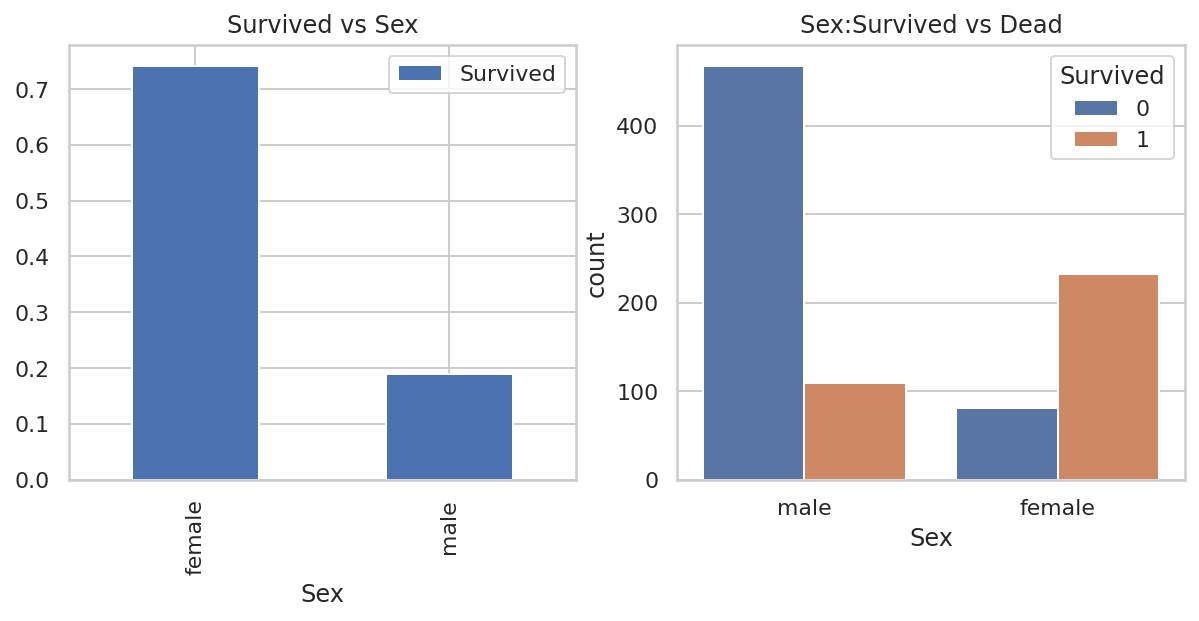

In [ ]:
#성별에 따른 생존율 bar graph
f, ax = plt.subplots(1, 2, figsize=(10, 4))
train_df[['Sex', 'Survived']].groupby(['Sex'], as_index=True).mean().plot.bar(ax=ax[0])
ax[0].set_title('Survived vs Sex')

sns.countplot('Sex', hue='Survived', data=train_df, ax=ax[1])
ax[1].set_title('Sex:Survived vs Dead')
plt.show()

### 승선한 형제자매,배우자 수(SibSp)에 따른 생존율 비교

In [ ]:
train_df[["SibSp", "Survived"]].groupby(['SibSp'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,SibSp,Survived
1,1,0.535885
2,2,0.464286
0,0,0.345395
3,3,0.250000
4,4,0.166667
5,5,0.000000
6,8,0.000000


- 형제자매와 배우자 수(SibSp)가 작을수록 생존확률이 높음

### 승선한 부모와 자식 수(Parch)에 따른 생존율 비교

In [ ]:
train_df[["Parch", "Survived"]].groupby(['Parch'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Parch,Survived
3,3,0.600000
1,1,0.550847
2,2,0.500000
0,0,0.343658
5,5,0.200000
4,4,0.000000
6,6,0.000000


- 식솔들 1,2,3명일 경우 생존률이 높다 
- 4,5,6명일 경우 생존률이 낮다

### 승선한 형제자매,배우자 수(SibSp) + 부모, 자식 수 (Parch)에 따른 생존율 비교

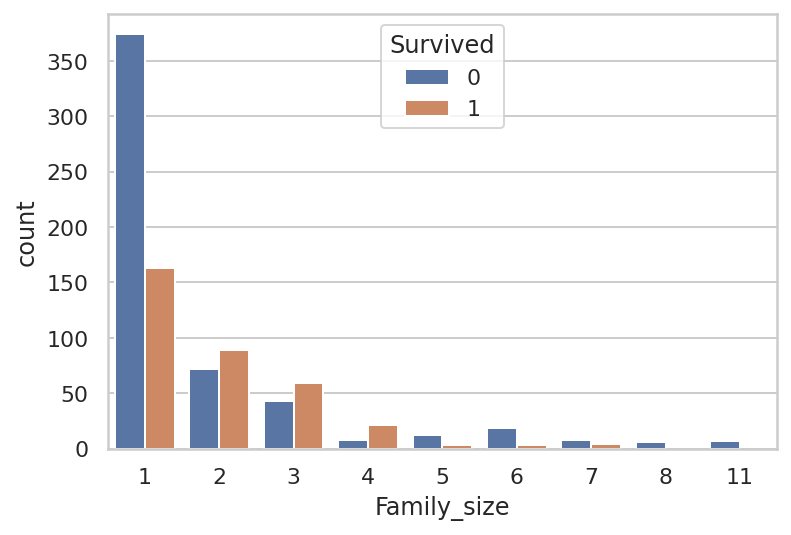

In [ ]:
# 위 두 컬럼을 합하여 해당 승객이 속한 가족구성원의 총 수를 구하여 새로운 파생변수를 생성
train_df['Family_size']=train_df['SibSp'] + train_df['Parch'] + 1
sns.countplot(data = train_df, x='Family_size', hue='Survived')

- 가족이 없는 경우 사망률이 더 높다.
- 2-4 명의 가족이 있는 경우 생존률이 비교적 높다.

### 생존 여부(Survived)에 따른 연령(Age) 분포

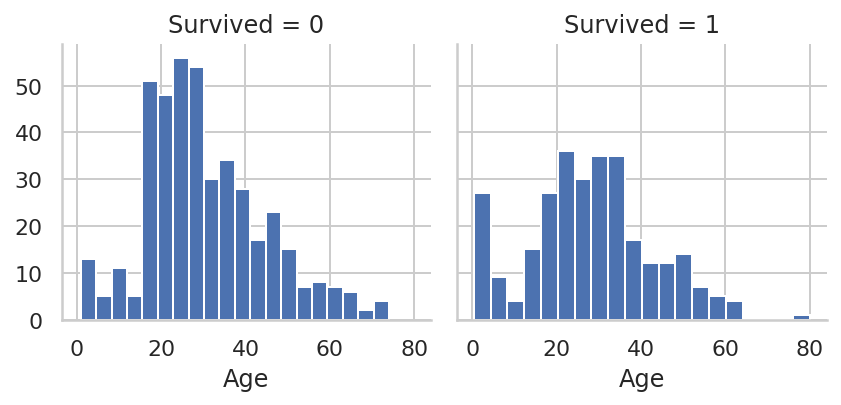

In [ ]:
# 열(col)을 생존 여부로 나눔
# FacetGrid(data, row, col, hue) : 다중 플롯 그리드를 만들어서 여러가지 쌍 관계를 표현하기 위한 그리드 Class이다. 도화지에 축을 나누는 것과 같다. 
g = sns.FacetGrid(train_df, col='Survived')
# 히스토그램으로 시각화, 연령의 분포를 확인, 히스토그램 bin을 20개로 설정
# bins 파라미터는 히스토그램의 가로축 구간의 개수를 지정합니다.
g.map(plt.hist, 'Age', bins=20)
# 1이 생존

- 4세 이하의 유아의 생존율이 높음
- 15 ~ 25세 승객들의 생존율이 높음

### 객실 등급(Pclass)과 생존 여부(Survived)에 따른 연령(Age) 분포

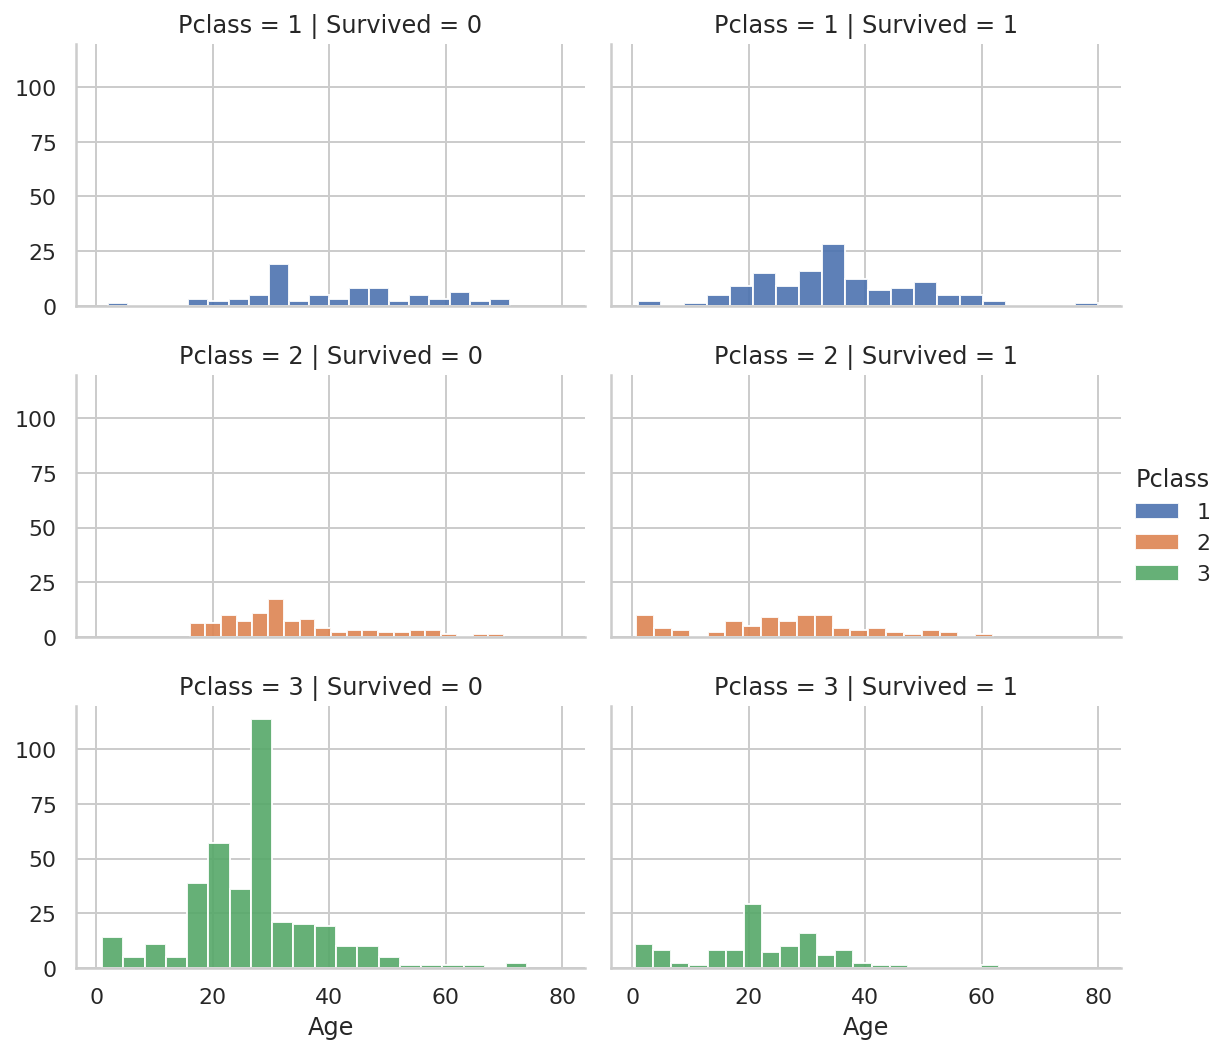

In [ ]:
# 열을 생존 여부, 행(row)과 색깔(hue)을 객실 등급으로 나눔, width = height * aspect
grid = sns.FacetGrid(train_df, col='Survived', row='Pclass', hue="Pclass", height=2.5, aspect=1.6)
grid.map(plt.hist, 'Age', alpha=.9, bins=20) # 투명도(alpha): 0.5

# 범례 추가
grid.add_legend();

+ 객실 등급이 3등급인 경우, 승객 수는 가장 많고, 생존율도 가장 낮음
+ 객실 등급이 2등급인 유아는 대부분 생존함
+ 객실 등급이 1등급인 경우 생존율이 비교적 높음

### 승선지(Embarked)와 객실 등급(Pclass)에 따른 생존율(Survived)

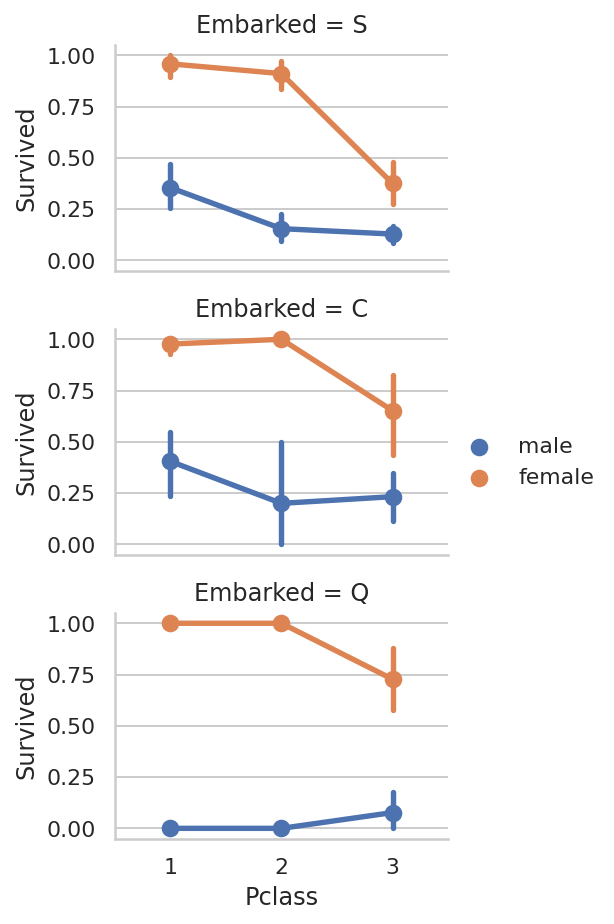

In [ ]:
grid = sns.FacetGrid(train_df, row='Embarked', height=2.2, aspect=1.6)

# Pointplot으로 시각화, x: 객실 등급, y: 생존 여부, 색깔: 성별, x축 순서: [1, 2, 3], 색깔 순서: [남성, 여성]
grid.map(sns.pointplot, 'Pclass', 'Survived', 'Sex', palette='deep', order = [1, 2, 3], hue_order = ["male", "female"])

grid.add_legend()

### 승선지(Embarked), 생존 여부(Survived), 성별(Sex)에 따른 요금(Fare)

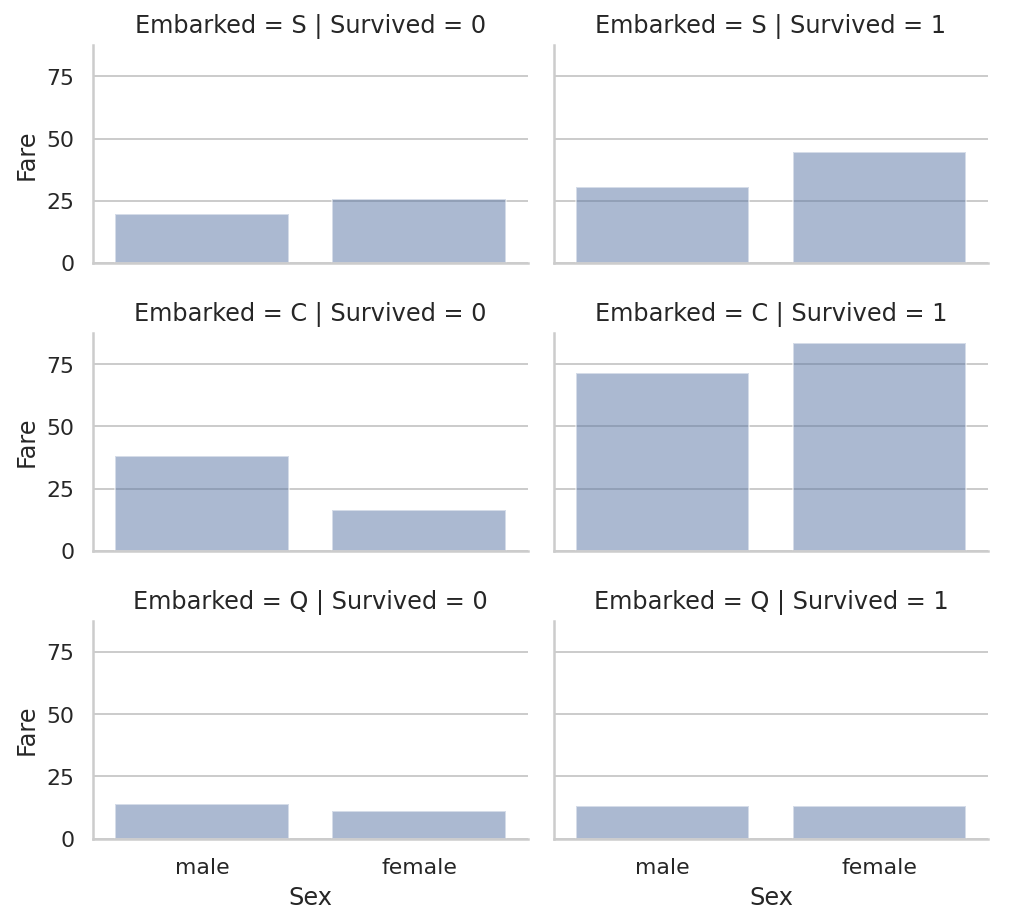

In [ ]:
grid = sns.FacetGrid(train_df, row='Embarked', col='Survived', height=2.2, aspect=1.6)

# x: 성별, y: 요금
grid.map(sns.barplot, 'Sex', 'Fare', alpha=.5, ci=None,order=["male","female"])

grid.add_legend()

- 승선지가 S또는 C인 경우, 생존한 승객들의 평균 요금이 비교적 높음
<br />C = Cherbourg<br />Q = Queenstown<br />S = Southampton

In [ ]:
pd.crosstab([train_df.Embarked,train_df.Pclass],[train_df.Sex,train_df.Survived],margins=True).style.background_gradient(cmap='summer_r')

- 세 승선지 모두 3등급의 여성 승객 생존율이 1,2 등급에 비해 떨어진다.

### Ticket

In [ ]:
train_df['Ticket'].value_counts().head(15)

CA. 2343        7
1601            7
347082          7
347088          6
3101295         6
CA 2144         6
S.O.C. 14879    5
382652          5
2666            4
PC 17757        4
349909          4
113760          4
113781          4
19950           4
W./C. 6608      4
Name: Ticket, dtype: int64

Text(0.5, 1.0, 'Ticket num : 3000000 ~ ')

findfont: Font family ['NanumBarunGothic'] not found. Falling back to DejaVu Sans.
findfont: Font family ['NanumBarunGothic'] not found. Falling back to DejaVu Sans.


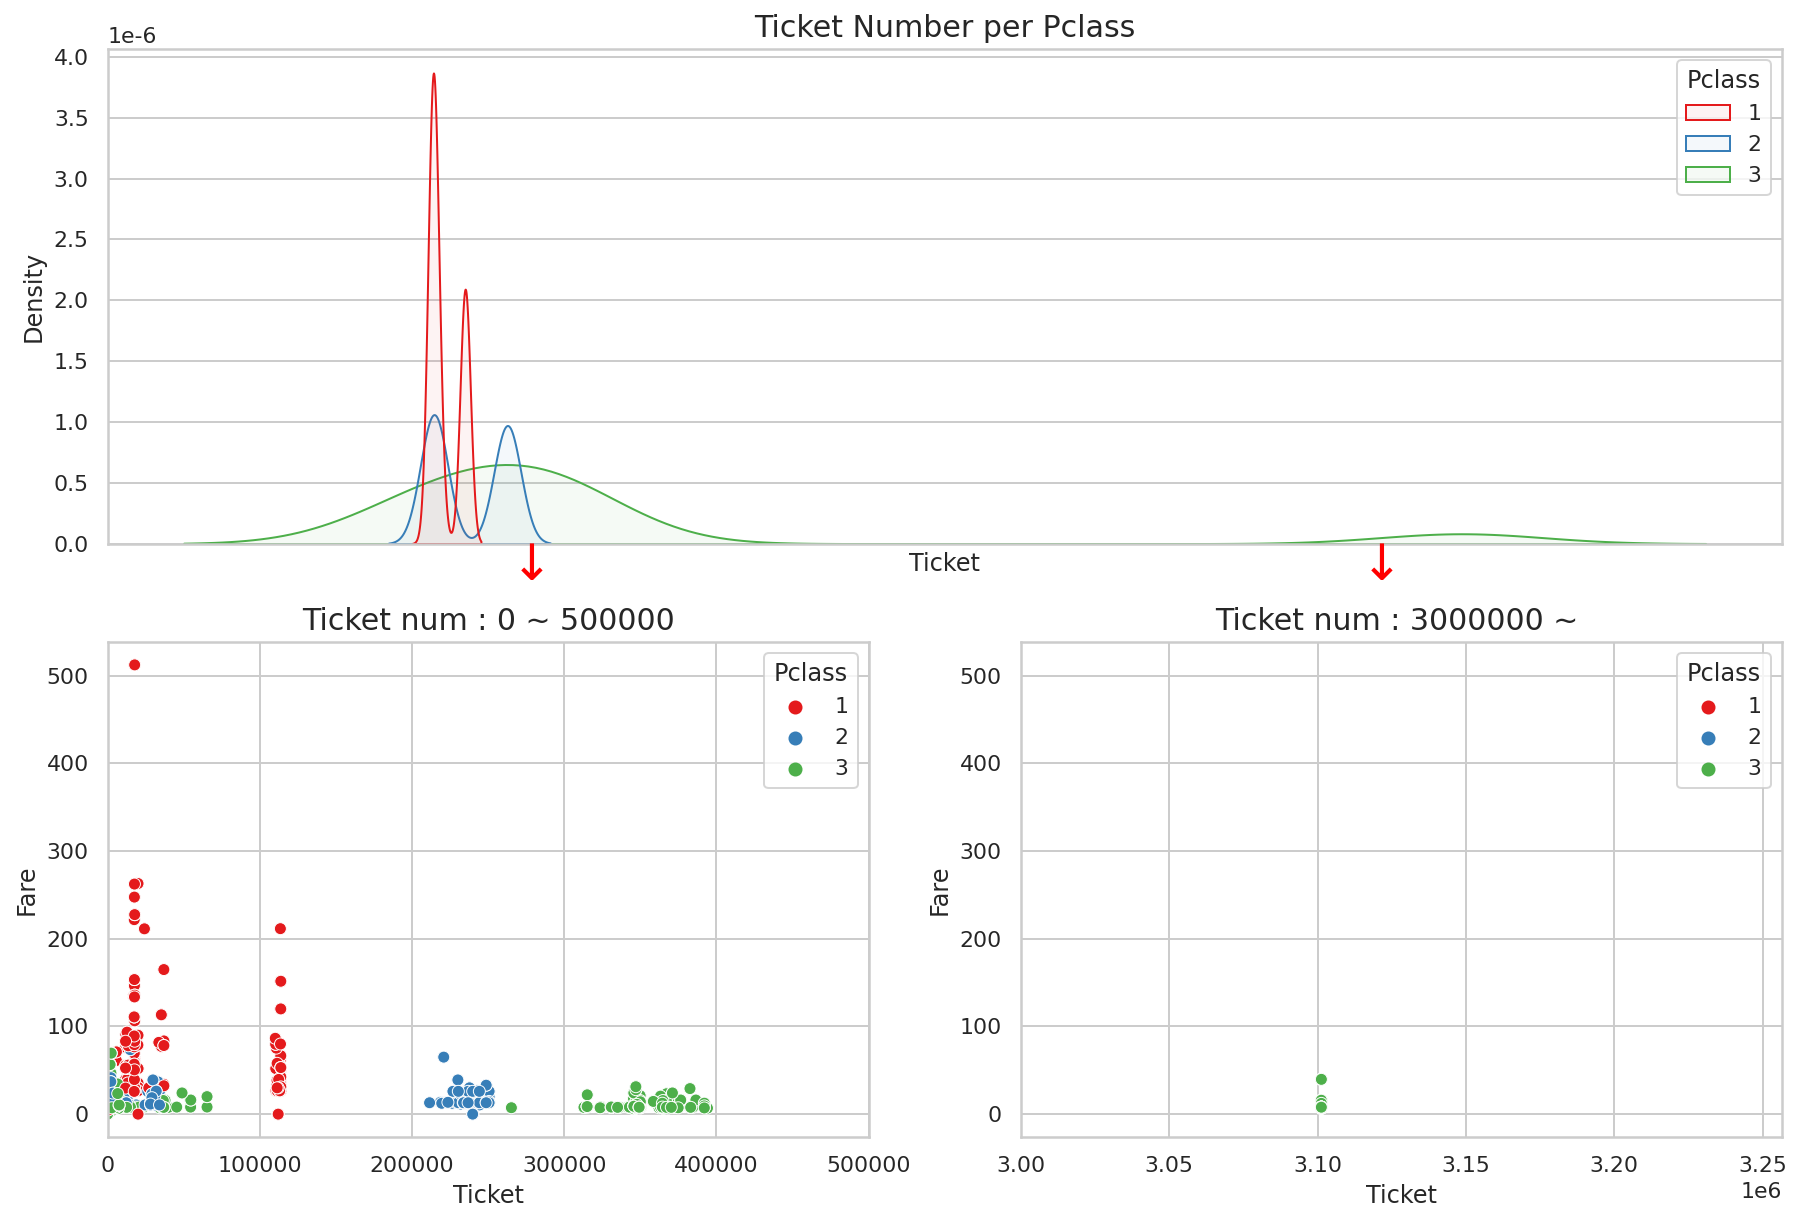

In [ ]:
# Ticket에서 숫자만 추출
tic_num = train_df['Ticket'].apply(lambda x: x.split(' ')[-1])
train_df['Ticket'] = tic_num.replace('LINE',0)
train_df['Ticket'] = train_df['Ticket'].apply(lambda x: int(x))

# plotting
plt.figure(figsize=(15,10))

plt.subplot(2,2,(1,2))
sns.kdeplot(data=train_df, x="Ticket", hue='Pclass',palette = 'Set1',fill=True,alpha=0.05)
plt.text(250000, -0.0000003,"↓",fontdict={'color':'red','size':25})
plt.text(2800000, -0.0000003,"↓",fontdict={'color':'red','size':25})
plt.xticks([])
plt.title('Ticket Number per Pclass', size=15)

plt.subplot(2,2,3)
sns.scatterplot(data=train_df, x="Ticket",y="Fare",hue="Pclass", palette="Set1")
plt.xlim(0,500000)
plt.title('Ticket num : 0 ~ 500000', size=15)

plt.subplot(2,2,4)
sns.scatterplot(data=train_df, x="Ticket",y="Fare",hue="Pclass", palette="Set1")
plt.xlim(3000000,)
plt.title('Ticket num : 3000000 ~ ', size=15)

### Fare

Text(0.5, 0.98, 'Fare(1 person) VS Ticket price(Team)')

findfont: Font family ['NanumBarunGothic'] not found. Falling back to DejaVu Sans.


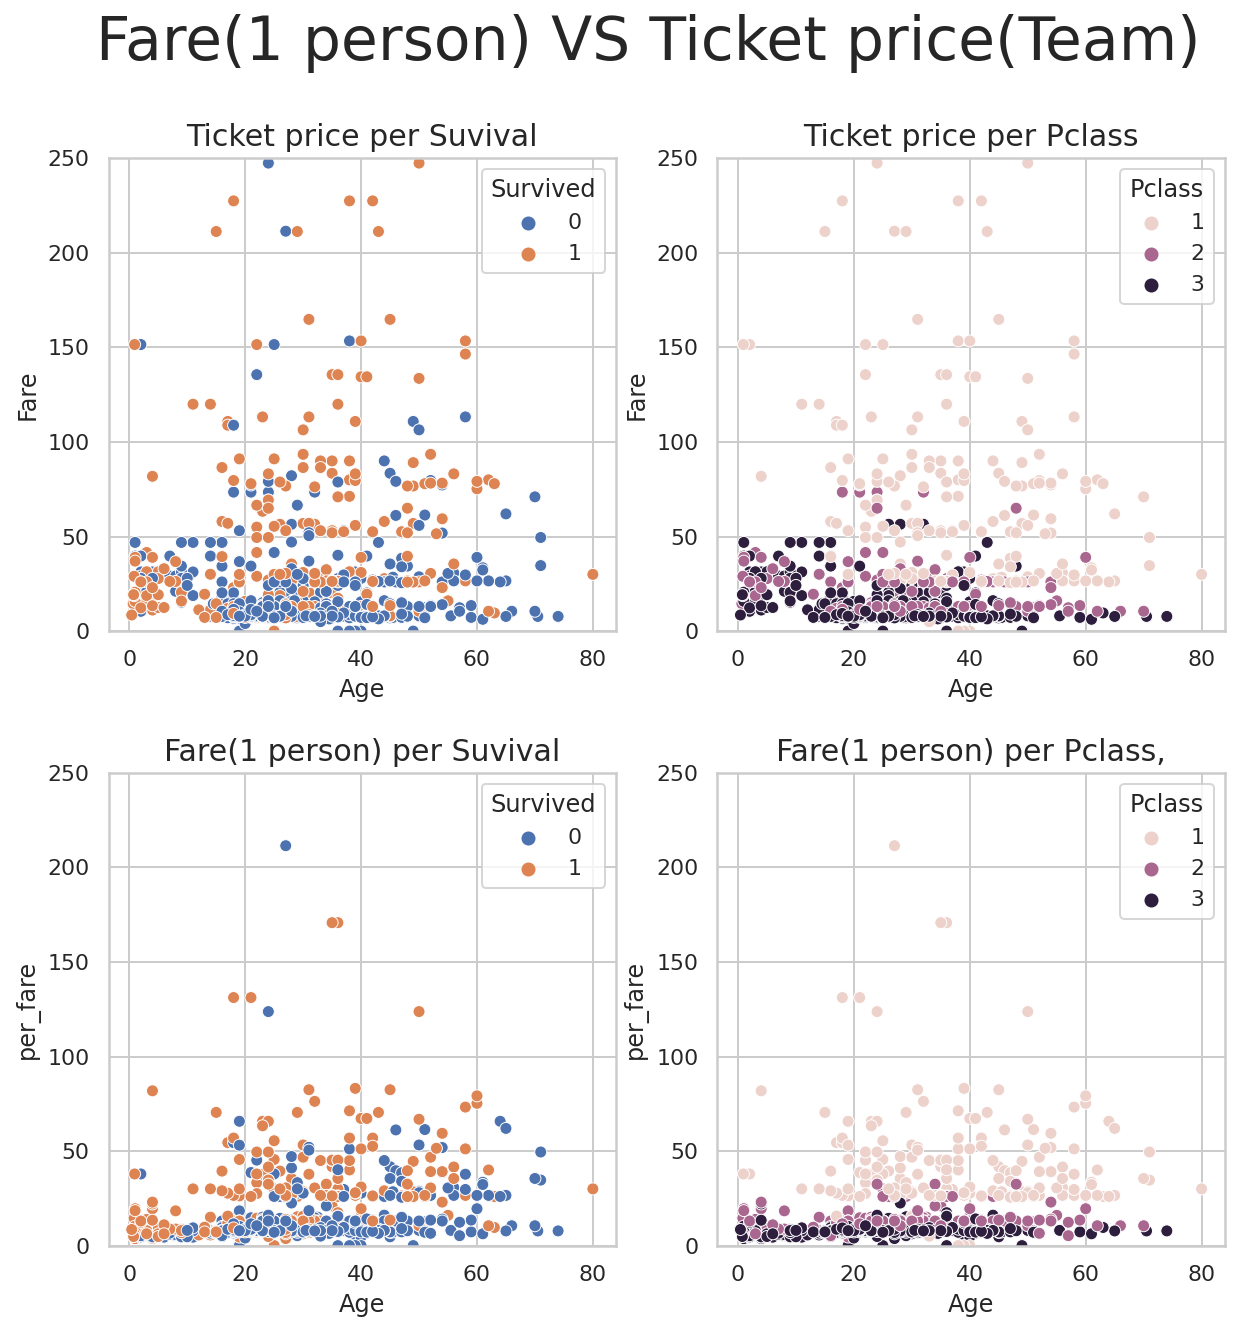

In [ ]:
# 인당 가격 컬럼 추가 (per_fare)
per_fare = train_df['Fare'].groupby(train_df['Ticket']).agg({('fare','mean'),('num','count')})
per_fare['per_fare'] = per_fare['fare']/per_fare['num']
per_fare.drop(['fare','num'], axis=1,inplace=True)
train = pd.merge(train_df, per_fare, on='Ticket')

# plotting
f, ax = plt.subplots(2,2,figsize=(10,10))
sns.scatterplot(data=train, x='Age',y='Fare', hue='Survived',ax=ax[0,0])
sns.scatterplot(data=train, x='Age',y='Fare', hue='Pclass',ax=ax[0,1])
sns.scatterplot(data=train, x='Age',y='per_fare', hue='Survived',ax=ax[1,0])
sns.scatterplot(data=train, x='Age',y='per_fare', hue='Pclass',ax=ax[1,1])
ax[0,0].set_ylim(0,250)
ax[0,1].set_ylim(0,250)
ax[1,0].set_ylim(0,250)
ax[1,1].set_ylim(0,250)

ax[0,0].set_title('Ticket price per Suvival', size=15)
ax[0,1].set_title('Ticket price per Pclass', size=15)
ax[1,0].set_title('Fare(1 person) per Suvival', size=15)
ax[1,1].set_title('Fare(1 person) per Pclass,', size=15)

plt.subplots_adjust(hspace=0.3)
plt.suptitle('Fare(1 person) VS Ticket price(Team)', size=30)

## 6.Feature Engineering & Initial Modeling 변수 선택 및 모델 구축

- 학습 모델에 학습을 시킬 데이터는 모두 숫자형 데이터이어야 한다.
- 사용할 Feature만 선택하기

Categorical Feature : Name, Sex, Ticket, Cabin, Embarked

Ordinal Feature : Pclass

Numeric Feature : PassengerId, Age, SibSp, Parch, Fare

In [ ]:
feature_1 = ['Survived','Pclass','Sex','Age_bin','Family_size','Fare','Embarked','Name_fix']

### 1) sklearn.linear_model.LogisticRegression()
- 로지스틱 회귀 모형
- 0과 1사이의 값을 산출

### 2) sklearn.tree.DecisionTreeClassifier()
- 의사결정 나무 모델


## 7.Model Tuning & Evaluation 모델 학습 및 검증

### 1) model.fit()
- 모델 학습

### 2) model.predict()
- 모델 예측

### 3) model.predict_proba()
- 모델 예측

### 4) pd.DataFrame.to_csv()
- csv파일 저장

## 8.Conclusion & Discussion 결과 및 결언